In [9]:
# Classification with CNN
# Fashion MNist

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
import pandas as pd
import seaborn as sns

In [10]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = f_mnist.load_data()

print(X_train.shape)
print(X_test.shape)




(60000, 28, 28)
(10000, 28, 28)


In [11]:
# this is 2D array (but CNN needs 3D array)
# CNN needs height x and width x color
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
# k = len(np.unique(Y_train))
k = len(set(Y_train))
print("number of classes:", k)

print("shape: ",X_train[0].shape)

number of classes: 10
shape:  (28, 28, 1)


In [14]:
# Build the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(k, activation='softmax')(x)

from tensorflow.keras import regularizers  # Import regularizers here
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) # Add the new Dense layer with regularization here
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

model.compile(
                 optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
             )

# Optimize Learning Rate
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Reduce learning rate if validation loss doesn't improve
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train with Callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, callbacks=[early_stop, lr_scheduler])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7513 - loss: 1.0530 - val_accuracy: 0.8432 - val_loss: 0.5009 - learning_rate: 0.0010
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8508 - loss: 0.4702 - val_accuracy: 0.8579 - val_loss: 0.4154 - learning_rate: 0.0010
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.3876 - val_accuracy: 0.8577 - val_loss: 0.4073 - learning_rate: 0.0010
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8776 - loss: 0.3519 - val_accuracy: 0.8723 - val_loss: 0.3686 - learning_rate: 0.0010
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8848 - loss: 0.3266 - val_accuracy: 0.8786 - val_loss: 0.3559 - learning_rate: 0.0010
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8940 - loss: 0.3053 - val_accuracy: 0.8813 - val_loss: 0.3541 - learning_rate: 0.0010
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8977 - 

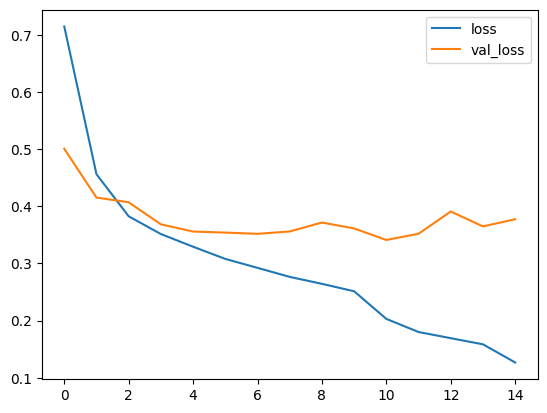

In [15]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


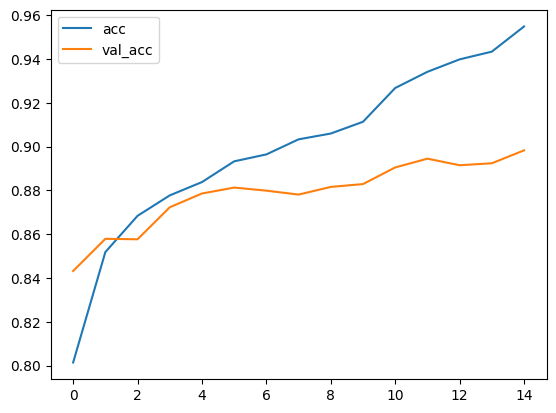

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_test, Y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


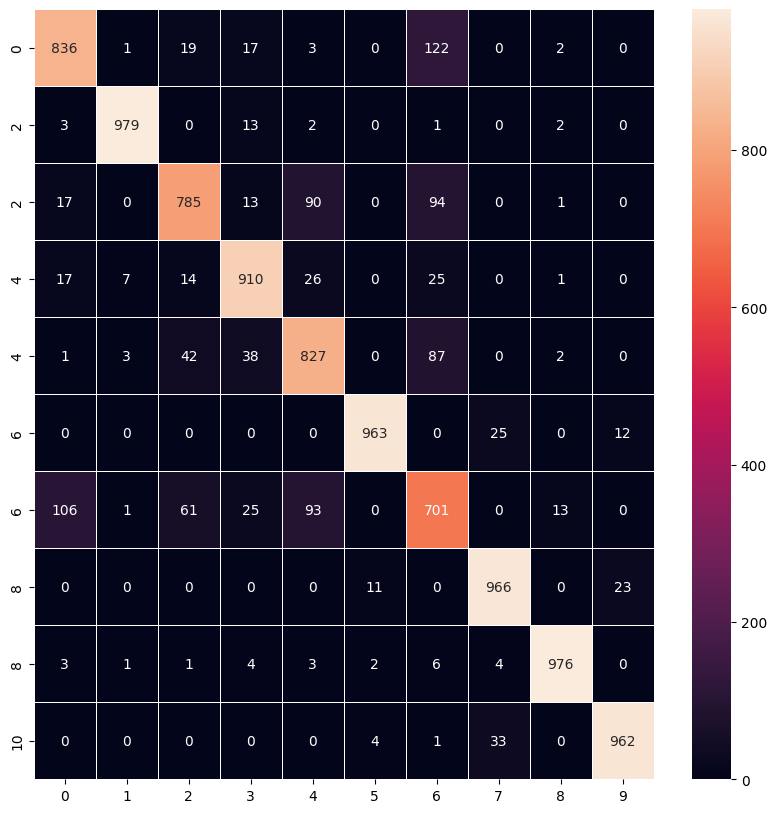

In [18]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(cm, annot=True, linewidths=0.5, fmt="d", ax=ax) #fmt="d" to display the values in the heatmap as integers
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.draw()
plt.show()




In [19]:
# pip install --upgrade scikit-learn

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[836   1  19  17   3   0 122   0   2   0]
 [  3 979   0  13   2   0   1   0   2   0]
 [ 17   0 785  13  90   0  94   0   1   0]
 [ 17   7  14 910  26   0  25   0   1   0]
 [  1   3  42  38 827   0  87   0   2   0]
 [  0   0   0   0   0 963   0  25   0  12]
 [106   1  61  25  93   0 701   0  13   0]
 [  0   0   0   0   0  11   0 966   0  23]
 [  3   1   1   4   3   2   6   4 976   0]
 [  0   0   0   0   0   4   1  33   0 962]]


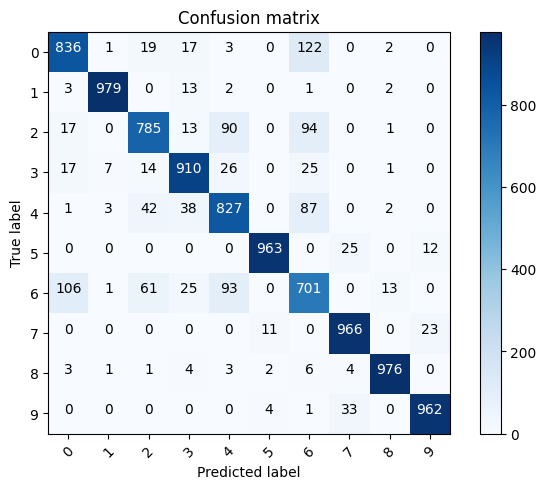

In [20]:
#predict
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.77MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.85MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.33MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

all labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
60000


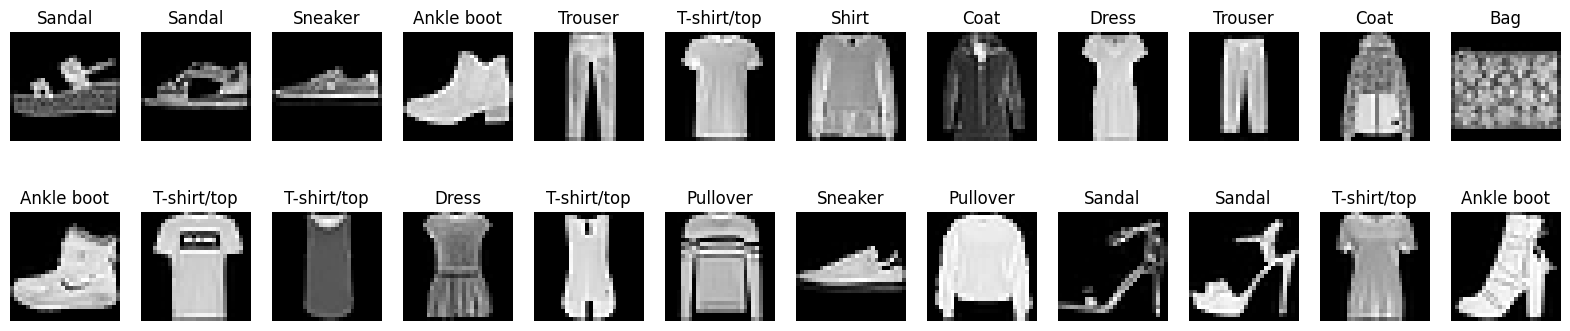

In [21]:
# Label mapping
# labels = '''T-shirts/top
# Trouser
# Pullover
# Dress
# Coat
# Sandal
# Boot
# Shirt'''.split()

# print(labels)

import torchvision.datasets as datasets
fashion_mnist = datasets.FashionMNIST(root='data', download=True)
labels = fashion_mnist.classes

print("all labels:", labels)
print(len(X_train))

import matplotlib.pyplot as plt


plt.figure(figsize=(20, 7))

row = 1
col = 1
idx = 1

for i in range(24):
    plt.subplot(row, 12, idx)

    plt.imshow(X_train[i], cmap='gray')
    plt.title(labels[Y_train[i]])
    plt.axis('off')

    # print(row,idx)

    if(idx == 12):
        row += 1
        idx = 1
        # print(row, idx)
    else:
        idx += 1

plt.subplots_adjust(hspace=1.0)
plt.show()



misclassified examples count:  1095


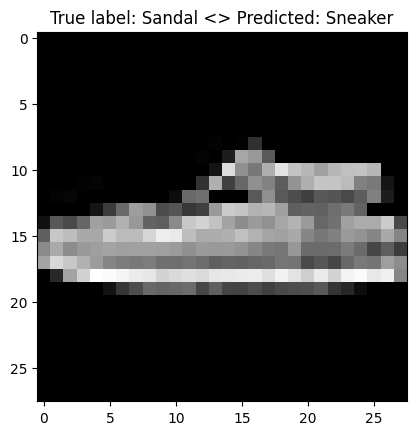

In [22]:
# show some misclassified example
misclassified_idx = np.where(p_test != Y_test)[0]
print("misclassified examples count: ", len(misclassified_idx))
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s <> Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));


correct classified examples count:  8905


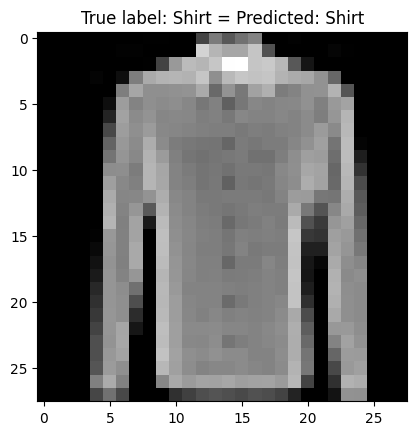

In [23]:
# show some correct classified example
ok  = np.where(p_test == Y_test)
not_ok  = np.where(p_test != Y_test)

corrclassified_idx = np.where(p_test == Y_test)[0]
print("correct classified examples count: ", len(corrclassified_idx))
i = np.random.choice(corrclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s = Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));


In [99]:
import os
import numpy as np
from PIL import Image

from google.colab import files
uploaded = files.upload()


Saving shoe.jpg to shoe.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: T-shirt/top


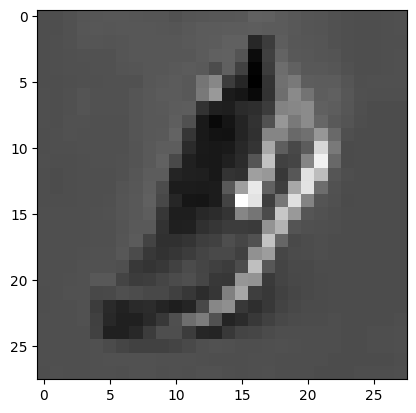

In [103]:

from PIL import Image
import numpy as np

# Load the JPEG image
image = Image.open('shoe.jpg')

#1
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28)) # Resize the image to 28x28 pixels
#end--------

image_array = np.array(image) # Convert the image to a numpy array
image_array = image_array.reshape(1, 28, 28, 1)

# Ensure the array is of type uint8
image_array = image_array.astype(np.uint8)

image_array # original shape (148, 148, 3)

X_train[0].shape, image_array.shape

predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {labels[predicted_class]}')

plt.imshow(image, cmap='gray')



In [70]:
from PIL import Image
import numpy as np

image = Image.open('shirt.jpg')
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28)) # Resize the image to 28x28 pixels
image_array = np.array(image) # Convert the image to a numpy array
image_array = image_array.reshape(1, 28, 28, 1)

image_array = image_array.astype(np.float32) / 255.0

# Now you can make predictions
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {labels[predicted_class]}')
labels
# image_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Sandal


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
# .reshape(28, 28), cmap='gray')
# image_array = image_array.reshape(28, 28)
# predictions = model.predict(image_array)
# predicted_class = np.argmax(predictions[0])
# print(f'Predicted class: {labels[predicted_class]}')

print("Training image shape: ", X_train[0].shape)
image_array



Training image shape:  (28, 28, 1)


array([[[[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.99607843],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.99607843],
         [1.        ],
         [0.99607843],
         [0.99215686],
         [0.99607843],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.8980392 ],
         [0.79607844],
         [0.83137256],
         [0.8       ],
         

In [110]:
model.save('local_fmnist_model1.h5')

In [108]:
model.save('my_fMnist_model.keras')



Doing prediction :-------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Predicted class: T-shirt/top


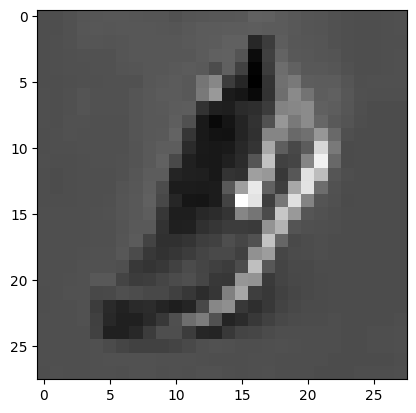

In [165]:
import tensorflow as tf
saved_model = ''
saved_model = tf.keras.models.load_model('my_fMnist_model.keras')
# saved_model.summary()

#----------------------
model = ''

from PIL import Image
import numpy as np

# Load the JPEG image
image = ''
image = Image.open('shoe.jpg')

#1
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28)) # Resize the image to 28x28 pixels
#end--------

image_array = np.array(image) # Convert the image to a numpy array
image_array = image_array.reshape(1, 28, 28, 1)
image_array = image_array.astype(np.uint8)
# image_array # original shape (148, 148, 3)
# X_train[0].shape, image_array.shape

print("\n\nDoing prediction :-------------------\n")
predictions = saved_model.predict(image_array)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {labels[predicted_class]}')

plt.imshow(image, cmap='gray')




In [163]:
print(predictions)
print(predicted_class)
print(labels)


[[0.3106638  0.05903216 0.1883423  0.13569562 0.05949351 0.02658483
  0.13998061 0.00658167 0.06803085 0.00559473]]
0
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
